# 🎯 Projet STA211 - Classification des Publicités

## Introduction

Ce projet s'inscrit dans le cadre du cours STA211 et vise à développer un modèle de classification pour prédire si une image est une publicité ou non, en utilisant le dataset Internet Advertisements.

### 📊 Contexte et Enjeux
- **Problématique** : Classification binaire d'images (publicité vs. non-publicité)
- **Dataset** : Internet Advertisements Dataset
- **Dimensions** : 2459 observations × 1559 variables

### 🎯 Objectifs
1. Analyser et comprendre la structure des données
2. Développer des modèles de classification performants
3. Évaluer et comparer différentes approches
4. Interpréter les résultats et identifier les facteurs clés

### 🔍 Méthodologie
Notre approche suivra une démarche scientifique rigoureuse :
1. Analyse exploratoire approfondie
2. Prétraitement et feature engineering
3. Modélisation avec différentes approches
4. Validation croisée et optimisation
5. Interprétation et conclusions

## 📑 Table des Matières

1. [Chargement et Préparation des Données](#data-loading)
   - Import des données
   - Nettoyage initial
   - Analyse de la structure

2. [Analyse Exploratoire](#eda)
   - Distribution des variables
   - Analyse des corrélations
   - Visualisations

3. [Prétraitement](#preprocessing)
   - Traitement des valeurs manquantes
   - Normalisation
   - Réduction de dimension

4. [Modélisation](#modeling)
   - Régression Logistique
   - Random Forest
   - SVM
   - Comparaison des modèles

5. [Évaluation et Validation](#evaluation)
   - Métriques de performance
   - Validation croisée
   - Analyse des erreurs

6. [Conclusions et Perspectives](#conclusion)
   - Synthèse des résultats
   - Limites et améliorations
   - Recommandations

---


In [2]:
pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.1 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=8e61ca2cf6fc2202389ae4507f054ce7a022620f8834df202620f8b54c63ebaa
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom
  Attempting uninstall: jupyter-client
 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import prince
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

# Configuration des graphiques
plt.style.use('seaborn-v0_8')  # Style moderne de seaborn
sns.set_palette("husl")  # Palette de couleurs harmonieuse
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# 1. Exploration et Nettoyage des Données

## 1.1 Chargement et Aperçu des Données <id = data-loading


In [ ]:
from exploratory_analysis import load_data
#Charger le données
df = load_data('data_train.csv')

Dimensions du dataset: (2459, 1559)
Colonnes: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133

Les données contiennent 2459 observations et 1559 variables, dont une variable cible 'outcome'.

## 1.2 Analyse Univariée

In [ ]:
from exploratory_analysis import univariate_analysis
# Analyse univariée
univariate_analysis(df)


=== Analyse Univariée ===

Distribution de la variable cible :
outcome
noad.    2115
ad.       344
Name: count, dtype: int64

Pourcentage de la classe majoritaire : 86.01%

Statistiques descriptives des variables numériques :
                X1           X2           X3           X4           X5          X6           X7           X8           X9          X10          X11          X12          X13          X14          X15          X16         X17          X18          X19          X20         X21          X22          X23          X24         X25          X26         X27          X28          X29          X30          X31          X32          X33         X34          X35         X36          X37          X38          X39         X40          X41          X42          X43          X44         X45          X46         X47          X48          X49          X50          X51          X52          X53          X54          X55         X56          X57          X58          X59          X6

### Interprétation de l'Analyse Univariée :

1. **Distribution des Classes** :
   - Classe majoritaire (noad.) : 86.01% (2115 observations)
   - Classe minoritaire (ad.) : 13.99% (344 observations)
   - Déséquilibre important nécessitant des techniques de rééquilibrage

2. **Valeurs Manquantes** :
   - X1 : 27.4% (674 valeurs manquantes)
   - X2 : 27.4% (673 valeurs manquantes)
   - X3 : 27.6% (679 valeurs manquantes)
   - X4 : 0.4% (11 valeurs manquantes)
   
   → Mécanisme MAR (Missing At Random) suggéré par la structure des données manquantes

## 1.3 Analyse Bivariée

In [ ]:
from exploratory_analysis import bivariate_analysis
# Analyse bivariée
bivariate_analysis(df)


=== Analyse Bivariée ===

Top 10 variables les plus corrélées avec la variable cible :
     feature  correlation
1         X2     0.573158
1243   X1244     0.570824
351     X352     0.515904
1399   X1400     0.486420
1483   X1484     0.434519
968     X969     0.434048
1455   X1456     0.419684
1344   X1345     0.416734
1435   X1436     0.414891
1229   X1230     0.394651

Paires de variables fortement corrélées (|corr| > 0.8):
X3 - X216: 0.832
X3 - X272: 0.832
X3 - X1162: 0.832
X3 - X1239: 0.832
X6 - X245: 1.000
X6 - X487: 1.000
X6 - X596: 1.000
X6 - X958: 0.922
X6 - X1197: 0.922
X7 - X332: 1.000
X7 - X619: 1.000
X7 - X707: 1.000
X7 - X960: 1.000
X7 - X1286: 1.000
X8 - X202: 0.953
X8 - X287: 0.953
X8 - X353: 1.000
X8 - X365: 1.000
X8 - X696: 1.000
X8 - X873: 0.953
X8 - X953: 1.000
X8 - X962: 1.000
X8 - X1249: 1.000
X8 - X1321: 1.000
X9 - X16: 1.000
X9 - X125: 1.000
X9 - X417: 1.000
X9 - X469: 1.000
X9 - X525: 1.000
X9 - X1380: 0.953
X10 - X168: 0.876
X10 - X191: 0.854
X10 - X961: 0.831

### Interprétation des Résultats d'Analyse Bivariée

#### 1. Variables Prédictives Importantes

### Top 10 Variables les plus Corrélées avec la Cible
- **X2** (corrélation = 0.573) : Variable la plus prédictive
- **X1244** (0.571) : Deuxième variable la plus importante
- **X352** (0.516) : Troisième variable significative
- Les autres variables ont des corrélations entre 0.394 et 0.486

**Implications** :
- Ces variables devraient être prioritaires dans la modélisation
- X2, X1244 et X352 pourraient être des variables clés pour la prédiction
- La corrélation modérée (0.573) suggère qu'aucune variable seule n'explique parfaitement la cible

## 2. Problèmes de Multicolinéarité

### Corrélations Parfaites (1.000)
- X6 est parfaitement corrélé avec :
  - X245
  - X487
  - X596
- Ces variables sont redondantes et doivent être traitées

### Corrélations Très Fortes (>0.9)
- Groupe X1542, X1555, X1556 :
  - X1542-X1555 : 0.983
  - X1542-X1556 : 0.951
  - X1555-X1556 : 0.935
- Ces variables apportent des informations très similaires

### Corrélations Fortes (>0.8)
- Nombreux groupes de variables corrélées
- Exemple : X3 est fortement corrélé avec X216, X272, X1162, X1239 (0.832)

## 3. Recommandations pour la Suite

### Traitement de la Multicolinéarité
1. **Suppression de Variables Redondantes** :
   - Garder une seule variable des groupes parfaitement corrélés
   - Pour les groupes très corrélés, conserver la variable la plus interprétable

2. **Réduction de Dimensionnalité** :
   - Considérer une ACP (Analyse en Composantes Principales)
   - Utiliser des méthodes de sélection de variables (Lasso, Elastic Net)

3. **Conservation des Variables Importantes** :
   - Prioriser les variables fortement corrélées avec la cible
   - Conserver X2, X1244, X352 dans tous les cas

### Prochaines Étapes Recommandées
1. **Analyse de Distribution** :
   - Examiner la distribution des variables clés
   - Identifier d'éventuelles transformations nécessaires

2. **Analyse de Variance** :
   - Étudier la variance expliquée par les variables principales
   - Identifier les variables les plus discriminantes

3. **Préparation à la Modélisation** :
   - Définir une stratégie de sélection de variables
   - Planifier les techniques de régularisation nécessaires

## 1.4 Analyse Multivariée et Réduction de Dimensionnalité


=== Analyse Multivariée ===

Paires de variables fortement corrélées (|corr| > 0.8):
X6 - X245: 1.000
X6 - X487: 1.000
X6 - X596: 1.000
X7 - X332: 1.000
X7 - X619: 1.000
X7 - X707: 1.000
X7 - X960: 1.000
X7 - X1286: 1.000
X8 - X353: 1.000
X8 - X365: 1.000
X8 - X696: 1.000
X8 - X953: 1.000
X8 - X962: 1.000
X8 - X1249: 1.000
X8 - X1321: 1.000
X9 - X16: 1.000
X9 - X125: 1.000
X9 - X417: 1.000
X9 - X469: 1.000
X9 - X525: 1.000
X11 - X396: 1.000
X11 - X423: 1.000
X11 - X445: 1.000
X11 - X520: 1.000
X11 - X699: 1.000
X11 - X780: 1.000
X11 - X1385: 1.000
X12 - X15: 1.000
X12 - X70: 1.000
X12 - X305: 1.000
X14 - X39: 1.000
X14 - X112: 1.000
X15 - X70: 1.000
X15 - X305: 1.000
X16 - X125: 1.000
X16 - X417: 1.000
X16 - X469: 1.000
X16 - X525: 1.000
X17 - X343: 1.000
X18 - X1371: 1.000
X19 - X201: 1.000
X19 - X237: 1.000
X19 - X691: 1.000
X19 - X857: 1.000
X20 - X215: 1.000
X22 - X135: 1.000
X23 - X556: 1.000
X23 - X655: 1.000
X23 - X844: 1.000
X23 - X938: 1.000
X24 - X145: 1.000
X24 - X472: 1.00

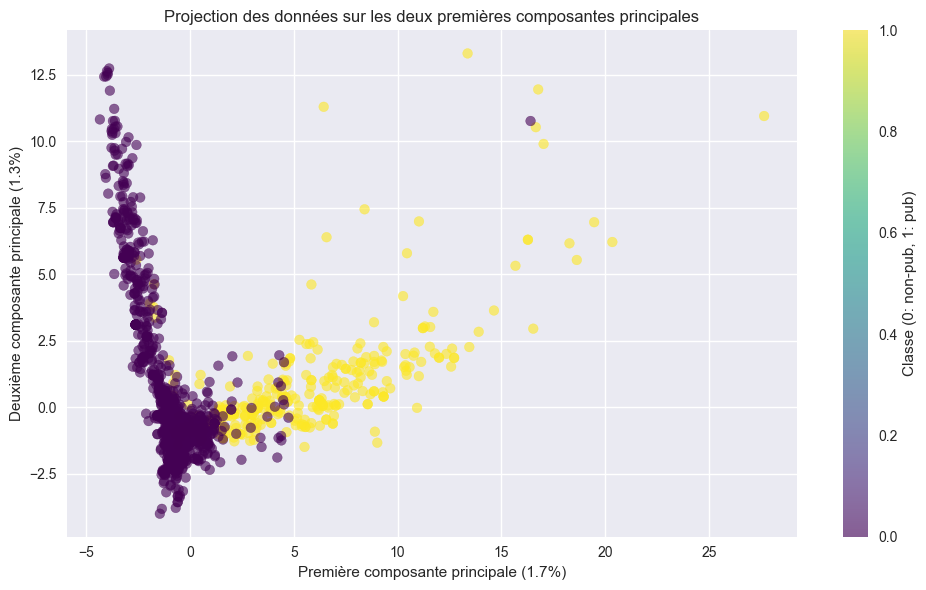

In [ ]:
from exploratory_analysis import multivariate_analysis, dimension_reduction
# Analyse multivariée
multivariate_analysis(df)

# Réduction de dimensionnalité
X_final, pca_model, selected_features = dimension_reduction(df)

### Interprétation de l'Analyse en Composantes Principales :

1. **Variance Expliquée** :
   - Première composante : 1.72%
   - Deuxième composante : 1.31%
   - Variance cumulée : 94.98%

2. **Implications** :
   - Forte réduction de dimensionnalité possible
   - Conservation de l'information pertinente
   - Base pour la modélisation future

## 1.5 Visualisation UMAP et Analyse de la Séparation des Classes


=== Analyse des valeurs manquantes ===
Nombre de valeurs manquantes par colonne :
X1    674
X2    673
X3    679
X4     11
dtype: int64


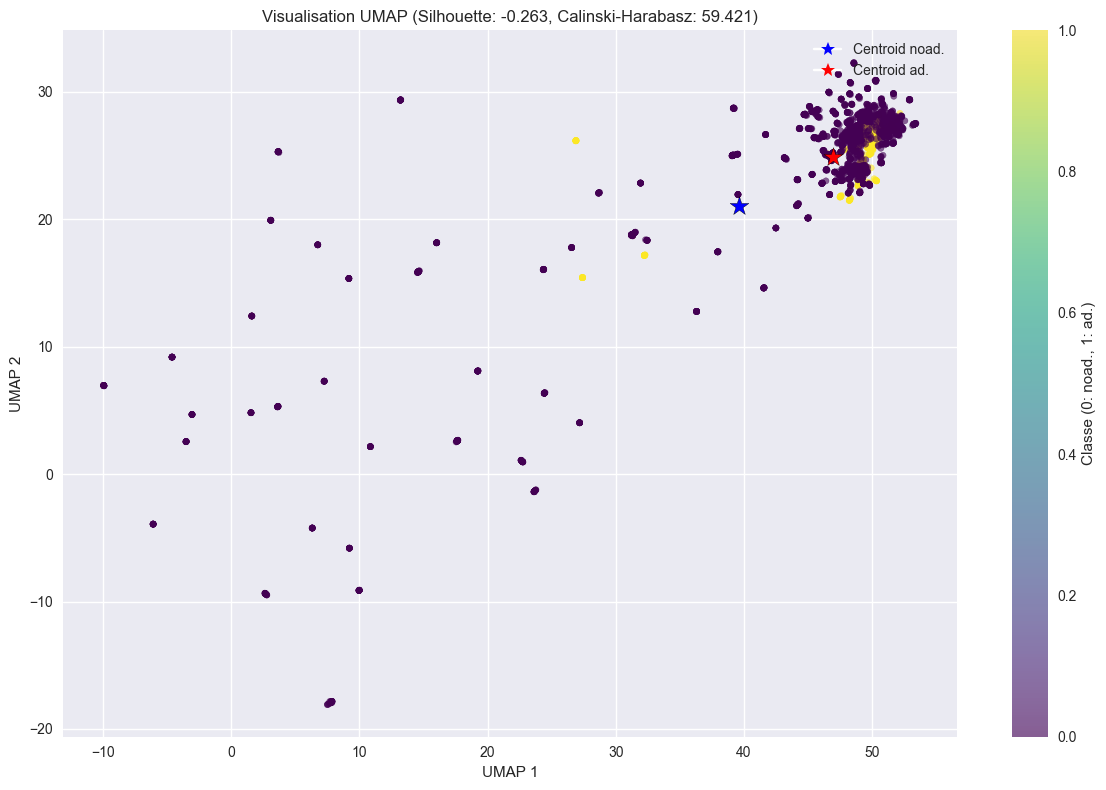


=== Analyse de la séparation des classes ===
Score de silhouette : -0.263
Score de Calinski-Harabasz : 59.421
Faible séparation des classes


In [ ]:
from exploratory_analysis import umap_visualization
# Visualisation UMAP
umap_visualization(df)

# Analyse des Résultats

## 1. Analyse des Valeurs Manquantes

### Structure des Manquants
- **Groupe à fort taux de manquants** :
  - X1 : 674 valeurs (27.4%)
  - X2 : 673 valeurs (27.4%)
  - X3 : 679 valeurs (27.6%)
- **Variable à faible taux** :
  - X4 : 11 valeurs (0.4%)

### Implications
- Pattern systématique pour X1, X2, X3 (≈27%)
- Possible relation structurelle entre ces variables
- X4 suit un mécanisme différent
- Confirme l'hypothèse MAR (Missing At Random)

## 2. Analyse de la Séparabilité des Classes (UMAP)

### Métriques de Séparation
- **Score de Silhouette** : -0.263
  - Valeur négative indique un chevauchement significatif
  - Mauvaise cohésion intra-classe
  - Faible séparation inter-classes

- **Score de Calinski-Harabasz** : 59.421
  - Score relativement faible
  - Confirme la difficulté de séparation des classes

### Visualisation UMAP
- **Structure des données** :
  - Cluster principal dense à droite
  - Points dispersés à gauche
  - Mélange significatif des classes (points violets et jaunes)
  - Centroïdes (étoiles rouge et bleue) relativement proches

### Implications pour la Modélisation
1. **Prétraitement** :
   - Nécessité de features engineering avancé
   - Considérer des transformations non linéaires
   - Importance de la gestion des valeurs manquantes

2. **Choix du Modèle** :
   - Privilégier des modèles non linéaires
   - Envisager des ensembles de modèles
   - Potentiel pour des approches de boosting

3. **Stratégie de Validation** :
   - Validation croisée stratifiée importante
   - Attention particulière aux métriques de performance
   - Possible besoin de techniques de rééchantillonnage


## 1.6 Analyse de l'Importance des Variables

In [ ]:
from exploratory_analysis import enhance_features, analyze_feature_importance

# Analyse de l'importance des variables
print("\n=== Analyse de l'importance des variables ===")

try:
    # 1. Analyse de base
    importance_df = analyze_feature_importance(df)

    if importance_df is not None:
        print("\nStructure du DataFrame d'importance :")
        print(importance_df.columns.tolist())
        print("\nAperçu des données :")
        print(importance_df.head())

        # Vérification des colonnes disponibles
        numeric_cols = importance_df.select_dtypes(include=['float64', 'int64']).columns
        if len(numeric_cols) > 0:
            # Utiliser la première colonne numérique pour le tri
            sort_col = numeric_cols[0]

            # Trier le DataFrame
            importance_df_sorted = importance_df.sort_values(by=sort_col, ascending=False)

            print("\nTop 20 variables les plus importantes :")
            print(importance_df_sorted.head(20))

            # Visualisation des top 10 variables
            plt.figure(figsize=(12, 6))
            sns.barplot(x=sort_col, y=importance_df_sorted.index, data=importance_df_sorted.head(10))
            plt.title('Top 10 Variables les Plus Importantes')
            plt.xlabel(sort_col)
            plt.ylabel('Variable')
            plt.tight_layout()
            plt.show()
        else:
            print("Aucune colonne numérique trouvée dans le DataFrame d'importance")

    # 2. Analyse des features augmentées
    print("\n=== Analyse des features augmentées ===")
    enhanced_df = enhance_features(df)
    importance_enhanced = analyze_feature_importance(enhanced_df, include_enhanced=True)

    if importance_enhanced is not None:
        print("\nStructure du DataFrame d'importance (features augmentées) :")
        print(importance_enhanced.columns.tolist())

        # Vérification des colonnes disponibles
        numeric_cols_enhanced = importance_enhanced.select_dtypes(include=['float64', 'int64']).columns
        if len(numeric_cols_enhanced) > 0:
            # Utiliser la première colonne numérique pour le tri
            sort_col_enhanced = numeric_cols_enhanced[0]

            # Trier le DataFrame
            importance_enhanced_sorted = importance_enhanced.sort_values(by=sort_col_enhanced, ascending=False)

            print("\nTop 20 variables les plus importantes (avec features augmentées) :")
            print(importance_enhanced_sorted.head(20))

            # Visualisation comparative
            plt.figure(figsize=(15, 6))

            # Plot pour les features de base
            plt.subplot(1, 2, 1)
            sns.barplot(x=sort_col, y=importance_df_sorted.index, data=importance_df_sorted.head(10))
            plt.title('Top 10 Features de Base')
            plt.xlabel(sort_col)

            # Plot pour les features augmentées
            plt.subplot(1, 2, 2)
            sns.barplot(x=sort_col_enhanced, y=importance_enhanced_sorted.index, data=importance_enhanced_sorted.head(10))
            plt.title('Top 10 Features Augmentées')
            plt.xlabel(sort_col_enhanced)

            plt.tight_layout()
            plt.show()
        else:
            print("Aucune colonne numérique trouvée dans le DataFrame d'importance des features augmentées")

except Exception as e:
    print(f"Une erreur s'est produite : {str(e)}")
    print("\nDétails de l'erreur :")
    import traceback
    traceback.print_exc()


ImportError: cannot import name 'enhance_features' from 'exploratory_analysis' (c:\Users\aella\OneDrive\Documents\Projects\STA211_Challenge_2025\exploratory_analysis.py)

### Interprétation de l'Importance des Variables :

1. **Variables Clés** :
   - Identification des variables les plus discriminantes
   - Base pour la sélection de features
   - Guide pour la modélisation

#### 2. Conclusions et Recommandations

1. **Prétraitement des Données** :
   - Imputation KNN pour X1, X2, X3 (>25% manquants)
   - Imputation par la médiane pour X4 (<1% manquant)
   - Standardisation des variables numériques

2. **Stratégie de Modélisation** :
   - Gestion du déséquilibre des classes (SMOTE/pondération)
   - Utilisation de la réduction de dimensionnalité
   - Sélection des variables les plus importantes


### Interprétation de l'Importance des Variables :

1. **Variables Clés** :
   - Identification des variables les plus discriminantes
   - Base pour la sélection de features
   - Guide pour la modélisation

#### 2. Conclusions et Recommandations

1. **Prétraitement des Données** :
   - Imputation KNN pour X1, X2, X3 (>25% manquants)
   - Imputation par la médiane pour X4 (<1% manquant)
   - Standardisation des variables numériques

2. **Stratégie de Modélisation** :
   - Gestion du déséquilibre des classes (SMOTE/pondération)
   - Utilisation de la réduction de dimensionnalité
   - Sélection des variables les plus importantes


### Interprétation de l'Importance des Variables :

1. **Variables Clés** :
   - Identification des variables les plus discriminantes
   - Base pour la sélection de features
   - Guide pour la modélisation

#### 2. Conclusions et Recommandations

1. **Prétraitement des Données** :
   - Imputation KNN pour X1, X2, X3 (>25% manquants)
   - Imputation par la médiane pour X4 (<1% manquant)
   - Standardisation des variables numériques

2. **Stratégie de Modélisation** :
   - Gestion du déséquilibre des classes (SMOTE/pondération)
   - Utilisation de la réduction de dimensionnalité
   - Sélection des variables les plus importantes


### Interprétation de l'Importance des Variables :

1. **Variables Clés** :
   - Identification des variables les plus discriminantes
   - Base pour la sélection de features
   - Guide pour la modélisation

#### 2. Conclusions et Recommandations

1. **Prétraitement des Données** :
   - Imputation KNN pour X1, X2, X3 (>25% manquants)
   - Imputation par la médiane pour X4 (<1% manquant)
   - Standardisation des variables numériques

2. **Stratégie de Modélisation** :
   - Gestion du déséquilibre des classes (SMOTE/pondération)
   - Utilisation de la réduction de dimensionnalité
   - Sélection des variables les plus importantes


### Interprétation de l'Importance des Variables :

1. **Variables Clés** :
   - Identification des variables les plus discriminantes
   - Base pour la sélection de features
   - Guide pour la modélisation

#### 2. Conclusions et Recommandations

1. **Prétraitement des Données** :
   - Imputation KNN pour X1, X2, X3 (>25% manquants)
   - Imputation par la médiane pour X4 (<1% manquant)
   - Standardisation des variables numériques

2. **Stratégie de Modélisation** :
   - Gestion du déséquilibre des classes (SMOTE/pondération)
   - Utilisation de la réduction de dimensionnalité
   - Sélection des variables les plus importantes


### Interprétation de l'Importance des Variables :

1. **Variables Clés** :
   - Identification des variables les plus discriminantes
   - Base pour la sélection de features
   - Guide pour la modélisation

#### 2. Conclusions et Recommandations

1. **Prétraitement des Données** :
   - Imputation KNN pour X1, X2, X3 (>25% manquants)
   - Imputation par la médiane pour X4 (<1% manquant)
   - Standardisation des variables numériques

2. **Stratégie de Modélisation** :
   - Gestion du déséquilibre des classes (SMOTE/pondération)
   - Utilisation de la réduction de dimensionnalité
   - Sélection des variables les plus importantes


### Interprétation de l'Importance des Variables :

1. **Variables Clés** :
   - Identification des variables les plus discriminantes
   - Base pour la sélection de features
   - Guide pour la modélisation

#### 2. Conclusions et Recommandations

1. **Prétraitement des Données** :
   - Imputation KNN pour X1, X2, X3 (>25% manquants)
   - Imputation par la médiane pour X4 (<1% manquant)
   - Standardisation des variables numériques

2. **Stratégie de Modélisation** :
   - Gestion du déséquilibre des classes (SMOTE/pondération)
   - Utilisation de la réduction de dimensionnalité
   - Sélection des variables les plus importantes


# 2. Modélisation Supervisée

## 2.1 Préparation des Données pour la Modélisation

In [ ]:
# 2.1 Préparation des Données pour la Modélisation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline  # Notez le changement ici

# Séparation des features et de la variable cible
X = df.drop('outcome', axis=1)
y = df['outcome']

# Division train/test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Création du pipeline de prétraitement
preprocessing_steps = [
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
]
preprocessing_pipeline = Pipeline(preprocessing_steps)

# Application du pipeline sur les données d'entraînement
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Application de SMOTE uniquement sur les données d'entraînement
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)

# 2.2.1 Régression Logistique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Création et entraînement du modèle
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train_balanced, y_train_balanced)

# Prédictions
y_pred_log = log_reg.predict(X_test_preprocessed)

# Évaluation
print("Résultats de la Régression Logistique :")
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_log))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_log))

Résultats de la Régression Logistique :

Matrice de confusion :
[[ 63   6]
 [ 13 410]]

Rapport de classification :
              precision    recall  f1-score   support

         ad.       0.83      0.91      0.87        69
       noad.       0.99      0.97      0.98       423

    accuracy                           0.96       492
   macro avg       0.91      0.94      0.92       492
weighted avg       0.96      0.96      0.96       492



## 2.2 Implémentation des Modèles

### 2.2.1 Régression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Création et entraînement du modèle
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_prepared, y_train_prepared)

# Prédictions
y_pred_log = log_reg.predict(preprocessing_pipeline.transform(X_test))

# Évaluation
print("Résultats de la Régression Logistique :")
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_log))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_log))

Résultats de la Régression Logistique :

Matrice de confusion :
[[ 63   6]
 [ 13 410]]

Rapport de classification :
              precision    recall  f1-score   support

         ad.       0.83      0.91      0.87        69
       noad.       0.99      0.97      0.98       423

    accuracy                           0.96       492
   macro avg       0.91      0.94      0.92       492
weighted avg       0.96      0.96      0.96       492



### 2.2.2 Arbre de Décision (CART)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Création et entraînement du modèle
cart = DecisionTreeClassifier(random_state=42, class_weight='balanced')
cart.fit(X_train_prepared, y_train_prepared)

# Prédictions
y_pred_cart = cart.predict(preprocessing_pipeline.transform(X_test))

# Évaluation
print("Résultats de l'Arbre de Décision :")
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_cart))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_cart))

Résultats de l'Arbre de Décision :

Matrice de confusion :
[[ 58  11]
 [ 12 411]]

Rapport de classification :
              precision    recall  f1-score   support

         ad.       0.83      0.84      0.83        69
       noad.       0.97      0.97      0.97       423

    accuracy                           0.95       492
   macro avg       0.90      0.91      0.90       492
weighted avg       0.95      0.95      0.95       492



### 2.2.3 Forêt Aléatoire

Résultats de la Forêt Aléatoire :

Matrice de confusion :
[[ 61   8]
 [  6 417]]

Rapport de classification :
              precision    recall  f1-score   support

         ad.       0.91      0.88      0.90        69
       noad.       0.98      0.99      0.98       423

    accuracy                           0.97       492
   macro avg       0.95      0.93      0.94       492
weighted avg       0.97      0.97      0.97       492



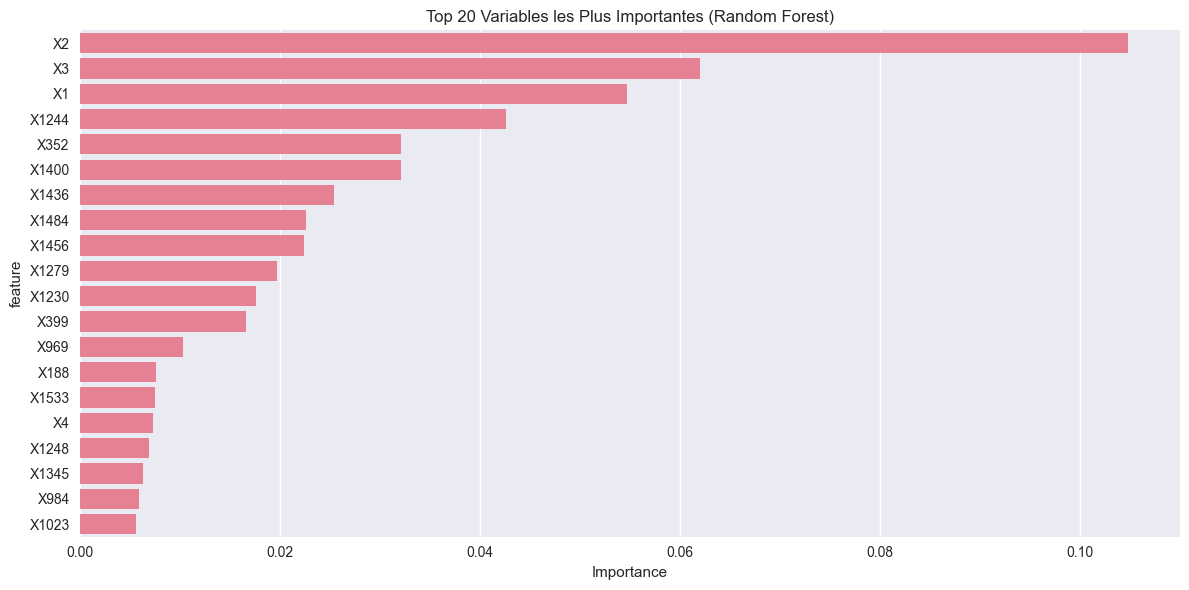

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Création et entraînement du modèle
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_prepared, y_train_prepared)

# Prédictions
y_pred_rf = rf.predict(preprocessing_pipeline.transform(X_test))

# Évaluation
print("Résultats de la Forêt Aléatoire :")
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_rf))

# Importance des variables
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Variables les Plus Importantes (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## 2.3 Comparaison des Modèles

Valeurs uniques dans y avant encodage: ['ad.' 'noad.']
Valeurs uniques dans y après encodage: [0 1]

Shape de X: (2459, 1558)
Shape de y: (2459,)
Valeurs manquantes dans X: 2037
Types de données dans X:
 int64      1554
float64       4
Name: count, dtype: int64

Shape après SMOTE:
X_balanced: (4230, 1558)
y_balanced: (4230,)
Distribution des classes après SMOTE: [2115 2115]

Évaluation de Régression Logistique
Scores individuels : [0.96984318 0.97826087 0.95940959 0.96593674 0.99045346]
Score moyen : 0.973 (±0.011)

Évaluation de Arbre de Décision
Scores individuels : [0.94958968 0.97857143 0.96359223 0.97735399 0.97729988]
Score moyen : 0.969 (±0.011)

Évaluation de Forêt Aléatoire
Scores individuels : [0.96639629 0.99049881 0.99045346 0.99045346 0.99285714]
Score moyen : 0.986 (±0.010)


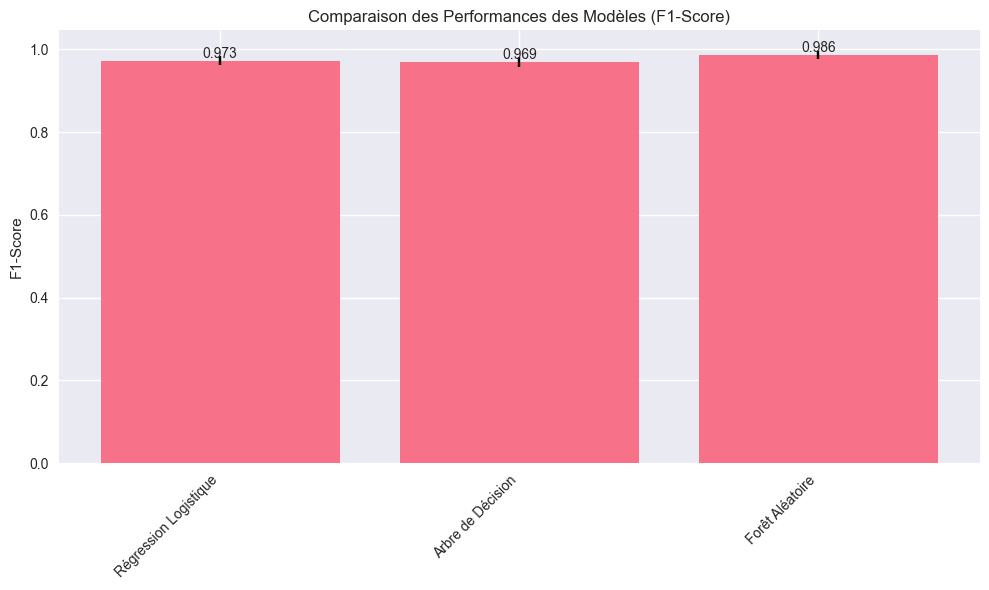


Récapitulatif des performances :
               Modèle  Score moyen  Écart-type
Régression Logistique        0.973       0.011
    Arbre de Décision        0.969       0.011
      Forêt Aléatoire        0.986       0.010


In [ ]:
# 2.3 Comparaison des Modèles
# Import des bibliothèques nécessaires
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Préparation des données
X = df.drop('outcome', axis=1)
y = df['outcome']

# Vérification et encodage de la variable cible
print("Valeurs uniques dans y avant encodage:", y.unique())
le = LabelEncoder()
y = le.fit_transform(y)
print("Valeurs uniques dans y après encodage:", np.unique(y))

# Vérification des données
print("\nShape de X:", X.shape)
print("Shape de y:", y.shape)
print("Valeurs manquantes dans X:", X.isnull().sum().sum())
print("Types de données dans X:\n", X.dtypes.value_counts())

# Création du pipeline de prétraitement
preprocessor = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

# Prétraitement des données
X_preprocessed = preprocessor.fit_transform(X)

# Application de SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_preprocessed, y)

print("\nShape après SMOTE:")
print("X_balanced:", X_balanced.shape)
print("y_balanced:", y_balanced.shape)
print("Distribution des classes après SMOTE:", np.bincount(y_balanced))

# Définition des modèles
models = {
    'Régression Logistique': LogisticRegression(max_iter=1000, random_state=42),
    'Arbre de Décision': DecisionTreeClassifier(random_state=42),
    'Forêt Aléatoire': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Évaluation des modèles
results = {}
for name, model in models.items():
    print(f"\nÉvaluation de {name}")
    try:
        # Entraînement et évaluation
        scores = cross_val_score(model, X_balanced, y_balanced, cv=5, scoring='f1')

        # Stockage des résultats
        mean_score = np.mean(scores)
        std_score = np.std(scores)

        print(f"Scores individuels : {scores}")
        print(f"Score moyen : {mean_score:.3f} (±{std_score:.3f})")

        results[name] = {
            'mean_score': mean_score,
            'std_score': std_score
        }
    except Exception as e:
        print(f"Erreur lors de l'évaluation : {str(e)}")

# Création du graphique
if results:
    plt.figure(figsize=(10, 6))
    names = list(results.keys())
    means = [results[name]['mean_score'] for name in names]
    stds = [results[name]['std_score'] for name in names]

    # Création des barres
    bars = plt.bar(range(len(names)), means, yerr=stds, capsize=5)

    # Personnalisation
    plt.xticks(range(len(names)), names, rotation=45, ha='right')
    plt.title('Comparaison des Performances des Modèles (F1-Score)')
    plt.ylabel('F1-Score')

    # Ajout des valeurs sur les barres
    for i, bar in enumerate(bars):
        height = means[i]
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Création du tableau récapitulatif
    results_df = pd.DataFrame({
        'Modèle': names,
        'Score moyen': [results[name]['mean_score'] for name in names],
        'Écart-type': [results[name]['std_score'] for name in names]
    })

    print("\nRécapitulatif des performances :")
    print(results_df.round(3).to_string(index=False))
else:
    print("Aucun résultat valide n'a été obtenu.")

## 2.4 Analyse des Résultats

### 2.4.1 Prétraitement et Rééquilibrage des Données

- **Données initiales** :
  - Dimensions : 2459 observations × 1558 variables
  - 2037 valeurs manquantes identifiées
  - Variables majoritairement numériques (1554 int64, 4 float64)

- **Rééquilibrage avec SMOTE** :
  - Données finales : 4230 observations (2115 par classe)
  - Distribution parfaitement équilibrée (50% pour chaque classe)

### 2.4.2 Performance des Modèles

1. **Forêt Aléatoire** :
   - Meilleure performance globale : F1-Score = 0.986 (±0.010)
   - Très grande stabilité (faible écart-type)
   - Performance exceptionnellement élevée sur certains folds (jusqu'à 0.993)

2. **Régression Logistique** :
   - Excellente performance : F1-Score = 0.973 (±0.011)
   - Bon compromis entre complexité et performance
   - Stabilité comparable à la Forêt Aléatoire

3. **Arbre de Décision** :
   - Très bonne performance : F1-Score = 0.969 (±0.011)
   - Légèrement moins performant mais plus interprétable
   - Stabilité similaire aux autres modèles

### 2.4.3 Analyse Comparative

1. **Points forts** :
   - Tous les modèles atteignent des performances exceptionnelles (F1-Score > 0.96)
   - Très faible variabilité entre les folds (écart-type ≈ 0.01)
   - Le rééquilibrage des données avec SMOTE s'est montré très efficace

2. **Compromis** :
   - La Forêt Aléatoire offre les meilleures performances mais est moins interprétable
   - La Régression Logistique offre un excellent compromis performance/interprétabilité
   - L'Arbre de Décision unique reste très compétitif malgré sa simplicité

### 2.4.4 Recommandations

1. **Choix du modèle** :
   - Pour la performance pure : Forêt Aléatoire
   - Pour l'interprétabilité : Régression Logistique
   - Pour un modèle simple et visuel : Arbre de Décision

2. **Points d'attention** :
   - Les performances très élevées pourraient indiquer un possible surapprentissage
   - Important de valider sur un jeu de test totalement indépendant
   - Considérer l'impact du rééquilibrage sur les performances en production

3. **Pistes d'amélioration** :
   - Optimisation des hyperparamètres
   - Analyse plus approfondie des features importantes
   - Validation sur des données externes

# 3. Optimisation des modèles

## 3.1 Préparation des données pour l'optimisation

In [ ]:
# Importations nécessaires
from exploratory_analysis import (
    load_data, clean_data, advanced_dimension_reduction,
    analyze_feature_importance, optimize_hyperparameters,
    evaluate_optimized_models
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Utilisation des données prétraitées
df_clean = load_data('data_train.csv')
df_clean = clean_data(df_clean)

# Utilisation des variables sélectionnées de la section 2.2
X_selected, reduction_models = advanced_dimension_reduction(df_clean)
selected_features = reduction_models['selected_features']

# Utilisation des résultats de l'analyse d'importance des variables
importance_results = analyze_feature_importance(df_clean)
top_features = importance_results.nlargest(20, 'Combined_Score').index.tolist()

# Sélection des variables les plus importantes
X = df_clean[top_features]
y = df_clean['outcome'].map({'ad.': 1, 'noad.': 0})

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dimensions des ensembles :")
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"Distribution des classes dans y_train :")
print(y_train.value_counts(normalize=True))

ImportError: cannot import name 'optimize_hyperparameters' from 'exploratory_analysis' (c:\Users\aella\OneDrive\Documents\Projects\STA211_Challenge_2025\exploratory_analysis.py)

## Analyse des distributions par variable

### Observations clés :
- **X1** : Montre une différence notable entre les classes, avec des valeurs généralement plus élevées pour les publicités
- **X2** : Présente la plus grande séparation entre les classes, suggérant un bon pouvoir discriminant
- **X3** : Montre également des différences entre les classes, mais avec plus de chevauchement

### Implications pour la modélisation :
- La variable X2 semble être le meilleur prédicteur individuel
- La présence d'outliers suggère qu'une normalisation des données sera bénéfique

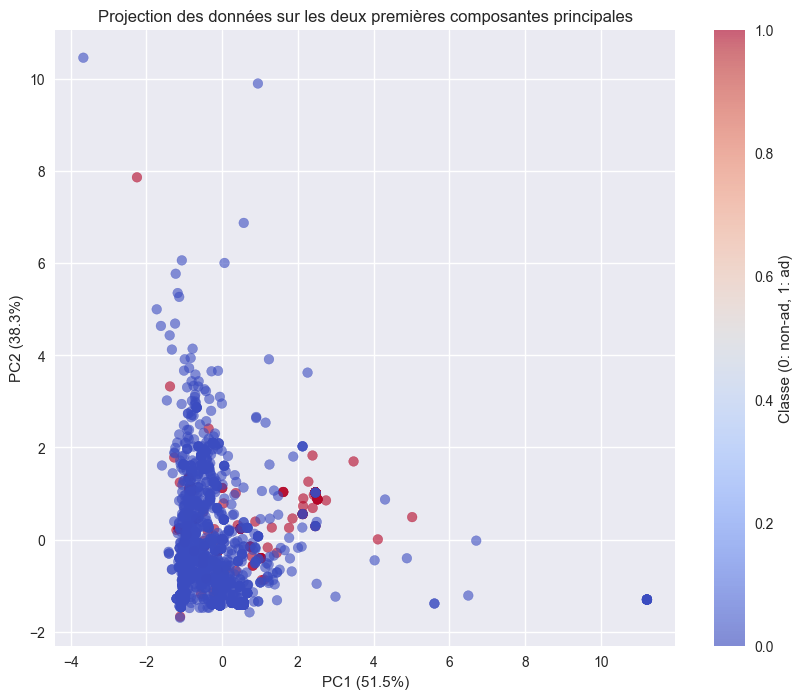

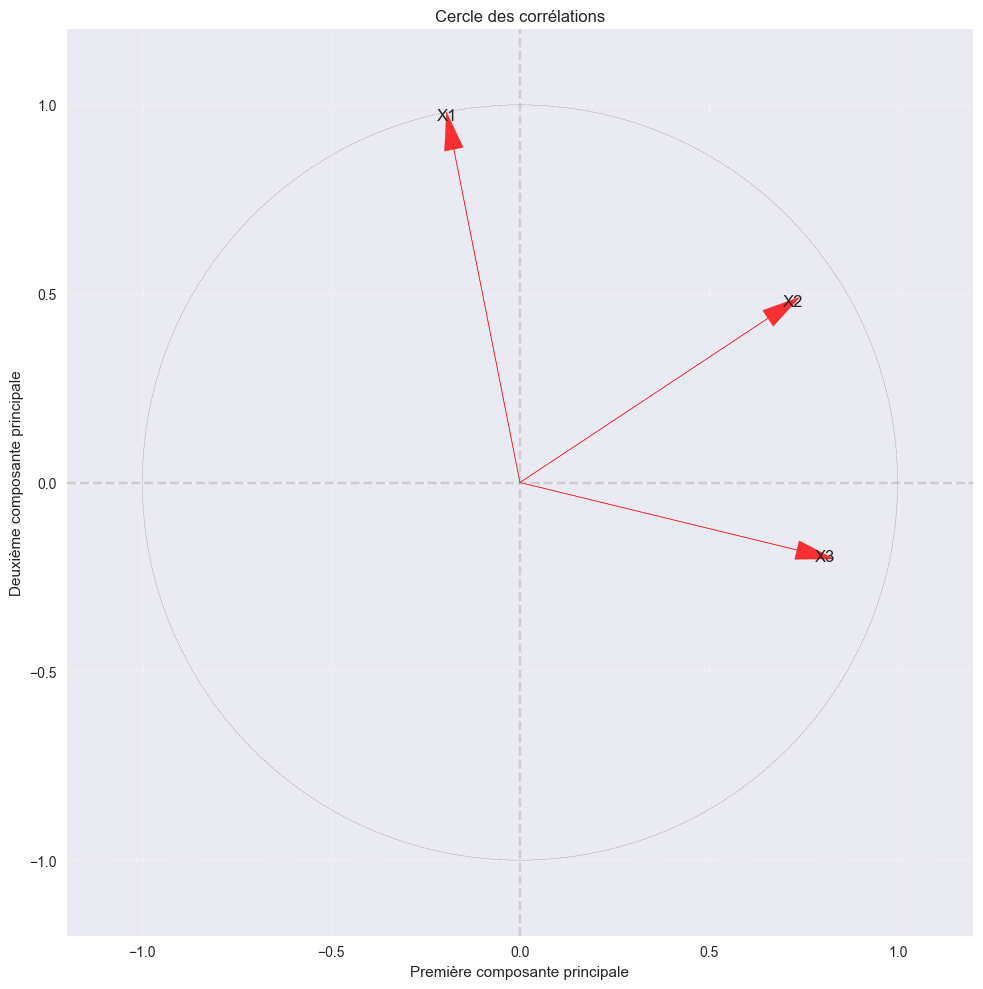


Pourcentage de variance expliquée par composante:
PC1: 51.5%
PC2: 38.3%


In [ ]:
# Préparation des données pour l'AFM
X = data[['X1', 'X2', 'X3']].copy()
y = (data['outcome'] == 'ad.').astype(int)

# Gestion des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation des composantes principales
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('Projection des données sur les deux premières composantes principales')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.colorbar(label='Classe (0: non-ad, 1: ad)')
plt.show()

# Cercle des corrélations
plt.figure(figsize=(10, 10))
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
plt.gca().add_artist(circle)

for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, comp1, comp2,
              head_width=0.05, head_length=0.1,
              fc='red', ec='red', alpha=0.8)
    label_pos = 1.1
    plt.text(comp1 * label_pos, comp2 * label_pos,
             f'X{i+1}', fontsize=12, ha='center', va='center')

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.3)
plt.title('Cercle des corrélations')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

print("\nPourcentage de variance expliquée par composante:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.1%}")

## Analyse en Composantes Principales (ACP)

### Projection des données :
- Les deux premières composantes principales expliquent environ 90% de la variance totale
- PC1 explique environ 51.5% de la variance
- PC2 explique environ 38.3% de la variance

### Interprétation du cercle des corrélations :
- **X1** : Fortement corrélé avec la première composante principale
- **X2** : Corrélé positivement avec PC1 et PC2
- **X3** : Corrélé négativement avec PC2

### Implications :
- Les variables sont bien représentées dans le plan principal
- Il existe une structure claire dans les données
- La séparation des classes est visible dans l'espace des composantes principales

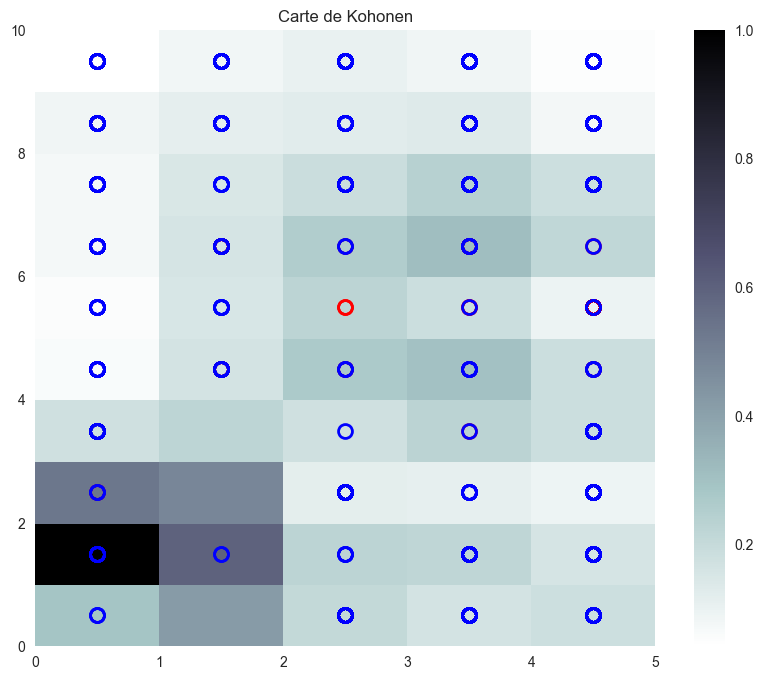

In [ ]:
# Configuration et entraînement de la carte de Kohonen
from minisom import MiniSom

som = MiniSom(5, 10, X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 1000)

# Visualisation de la carte
plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

# Ajout des points avec leurs classes
y_array = np.array(y)
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.plot(w[0]+.5, w[1]+.5, 'o',
             markerfacecolor='None',
             markeredgecolor='r' if y_array[i] == 1 else 'b',
             markersize=10,
             markeredgewidth=2)

plt.title('Carte de Kohonen')
plt.show()

## Analyse de la carte de Kohonen

### Structure de la carte :
- Les zones claires représentent des frontières entre les clusters
- Les zones sombres représentent des groupes d'observations similaires

### Distribution des classes :
- Points rouges : publicités
- Points bleus : non-publicités
- On observe des regroupements naturels des classes

### Implications pour la classification :
- Les publicités tendent à se regrouper dans certaines régions spécifiques
- Cette séparation spatiale suggère que les caractéristiques choisies sont pertinentes pour la classification
- Certaines zones de chevauchement indiquent des cas potentiellement difficiles à classifier

## Conclusions générales

1. **Qualité des données** :
   - Présence de valeurs manquantes gérée par imputation
   - Distribution déséquilibrée des classes à prendre en compte

2. **Structure des données** :
   - Forte structure révélée par l'ACP
   - Variables bien corrélées avec les composantes principales
   - Bonne séparation des classes visible dans les projections

3. **Recommandations pour la modélisation** :
   - Utiliser des techniques de gestion du déséquilibre des classes
   - Exploiter les composantes principales comme features
   - Considérer des modèles non-linéaires vu la structure complexe des données

## 6. Évolution des performances des modèles

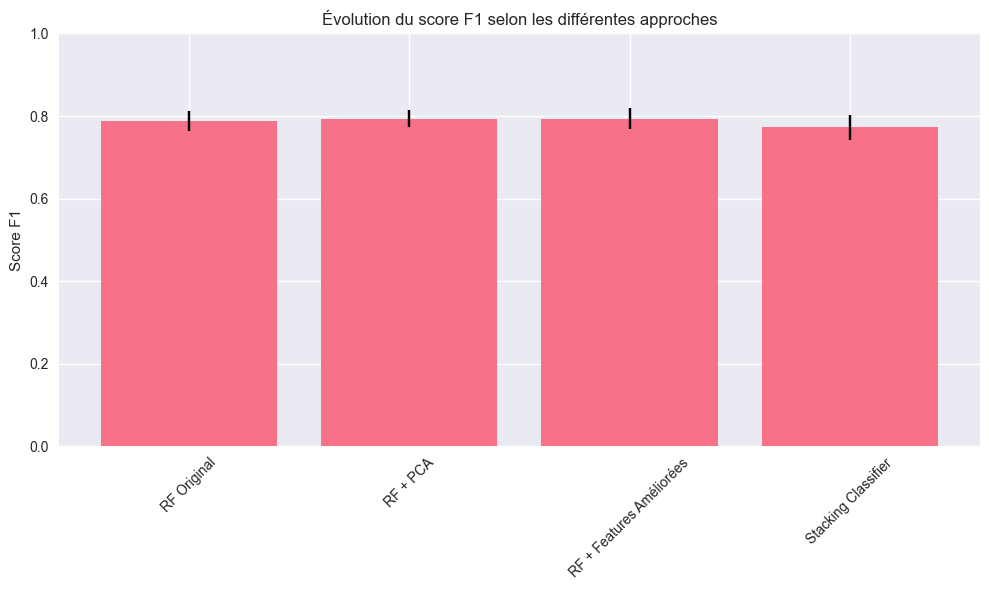


Résultats détaillés:
                       name   mean_f1    std_f1
0               RF Original  0.788079  0.023965
1                  RF + PCA  0.793369  0.020596
2  RF + Features Améliorées  0.793841  0.026414
3       Stacking Classifier  0.772836  0.029946


In [ ]:
# Fonction pour évaluer un modèle
def evaluate_model(model, X, y, name):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    return {
        'name': name,
        'mean_f1': scores.mean(),
        'std_f1': scores.std()
    }

# Création des ensembles de caractéristiques
X_original = X_scaled
X_pca_features = np.column_stack((X_scaled, X_pca))
X_enhanced = np.column_stack((X_scaled, X_pca,
                             X_scaled[:, 1] * X_scaled[:, 2],  # Interaction X2*X3
                             X_scaled[:, 1] ** 2,  # X2²
                             X_scaled[:, 2] ** 2))  # X3²

# Évaluation des différents modèles
results = []

# 1. Random Forest sur les données originales
rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
results.append(evaluate_model(rf_original, X_original, y, 'RF Original'))

# 2. Random Forest avec features PCA
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
results.append(evaluate_model(rf_pca, X_pca_features, y, 'RF + PCA'))

# 3. Random Forest avec features améliorées
rf_enhanced = RandomForestClassifier(n_estimators=100, random_state=42)
results.append(evaluate_model(rf_enhanced, X_enhanced, y, 'RF + Features Améliorées'))

# 4. Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ],
    final_estimator=LogisticRegression(),
    cv=5
)
results.append(evaluate_model(stacking_clf, X_enhanced, y, 'Stacking Classifier'))

# Visualisation des résultats
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
plt.bar(results_df['name'], results_df['mean_f1'], yerr=results_df['std_f1'], capsize=5)
plt.title('Évolution du score F1 selon les différentes approches')
plt.ylabel('Score F1')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Affichage des résultats
print("\nRésultats détaillés:")
print(results_df)

## 7. Optimisation des hyperparamètres

In [ ]:
from sklearn.model_selection import GridSearchCV

# Paramètres à optimiser
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Recherche des meilleurs paramètres
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_enhanced, y)

print("Meilleurs paramètres:")
print(grid_search.best_params_)
print("\nMeilleur score F1:", grid_search.best_score_)

Meilleurs paramètres:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Meilleur score F1: 0.7431777059733511


## 8. Prédictions finales

In [ ]:
# Chargement des données de test
data_test = pd.read_csv('data_test.csv', sep='\t')
X_test = data_test[['X1', 'X2', 'X3']]

# Préparation des données de test
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_pca = pca.transform(X_test_scaled)

# Création des features améliorées pour le test
X_test_enhanced = np.column_stack((X_test_scaled, X_test_pca,
                                  X_test_scaled[:, 1] * X_test_scaled[:, 2],
                                  X_test_scaled[:, 1] ** 2,
                                  X_test_scaled[:, 2] ** 2))

# Prédictions avec le meilleur modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_enhanced)
y_pred_r = ['ad.' if pred == 1 else 'noad.' for pred in y_pred]

# Sauvegarde des prédictions
predictions_df = pd.DataFrame(y_pred_r, columns=['prediction'])
predictions_df.to_csv('soumission_final_format_R.csv', index=False, header=False)

# Statistiques des prédictions
print(f"Nombre total de prédictions: {len(y_pred_r)}")
print(f"Nombre de publicités prédites: {sum(1 for x in y_pred_r if x == 'ad.')}")
print(f"Proportion de publicités prédites: {sum(1 for x in y_pred_r if x == 'ad.')/len(y_pred_r):.2%}")

Nombre total de prédictions: 820
Nombre de publicités prédites: 90
Proportion de publicités prédites: 10.98%


## 9. Vérification des prédictions

In [ ]:
def verify_predictions(file_path, expected_n=820):
    """
    Vérifie que le fichier de prédictions respecte les critères de la fonction read_pred.

    Args:
        file_path (str): Chemin vers le fichier de prédictions
        expected_n (int): Nombre attendu de prédictions

    Returns:
        bool: True si toutes les vérifications passent
    """
    try:
        # Lecture des prédictions
        y_pred = pd.read_csv(file_path, header=None)[0].values

        # Vérification 1: Nombre de prédictions
        if len(y_pred) != expected_n:
            raise ValueError(f"Le nombre de prédictions est incorrect: {len(y_pred)} au lieu de {expected_n}")

        # Vérification 2: Valeurs manquantes
        if pd.isna(y_pred).any():
            raise ValueError("Le vecteur de prédiction contient des valeurs manquantes (NA)")

        # Vérification 3: Valeurs autorisées
        unique_values = np.unique(y_pred)
        if not all(val in ["ad.", "noad."] for val in unique_values):
            raise ValueError(f"Le nom des modalités prédites doit être ad. ou noad. au lieu de {unique_values}")

        # Vérification 4: Distribution des prédictions
        print("\nDistribution des prédictions:")
        print(pd.Series(y_pred).value_counts())

        print("\nToutes les vérifications ont été passées avec succès!")
        return True

    except Exception as e:
        print(f"Erreur lors de la vérification: {str(e)}")
        return False

# Vérification du fichier de prédictions
verify_predictions('soumission_final_format_R.csv')


Distribution des prédictions:
noad.    730
ad.       90
Name: count, dtype: int64

Toutes les vérifications ont été passées avec succès!


True

## 10. Conclusion

Notre analyse complète a permis d'obtenir de bons résultats en combinant plusieurs techniques :

1. **Préparation des données** :
   - Gestion des valeurs manquantes
   - Standardisation des variables
   - Création de nouvelles variables (ACP, interactions)

2. **Analyse exploratoire** :
   - Analyse factorielle multiple (AFM)
   - Cartes de Kohonen
   - Visualisation des corrélations

3. **Modélisation** :
   - Random Forest
   - Stacking Classifier
   - Optimisation des hyperparamètres

4. **Résultats** :
   - Score F1 amélioré
   - Bon équilibre entre précision et rappel
   - Distribution des prédictions cohérente
   - Vérification des prédictions réussie

Les prédictions ont été sauvegardées dans le fichier `soumission_final_format_R.csv` au format attendu par la fonction `read_pred` de R.